Utiliser random forest sur le jeu de données wine_quality, évaluer le modèle et ses hyperparamètres.

quelles sont les features les plus importantes?

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [3]:
url = "https://gist.githubusercontent.com/jsz4n/b7ca11015784086788022a539935d0cf/raw/a8c3abf0a31f5c0df5e0ddd76fb9b289bac9bed1/winequality-red.csv"

In [4]:
df = pd.read_csv(url, sep=";")

## Exploration du jeu de données

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
categorical_features = []

In [7]:
X = df.copy()
y = X.pop("quality")

In [104]:
rf = RandomForestClassifier(n_estimators=20, n_jobs=4)
rf.fit(X,y)

RandomForestClassifier(n_estimators=20, n_jobs=4)

<Axes: xlabel='feature_name'>

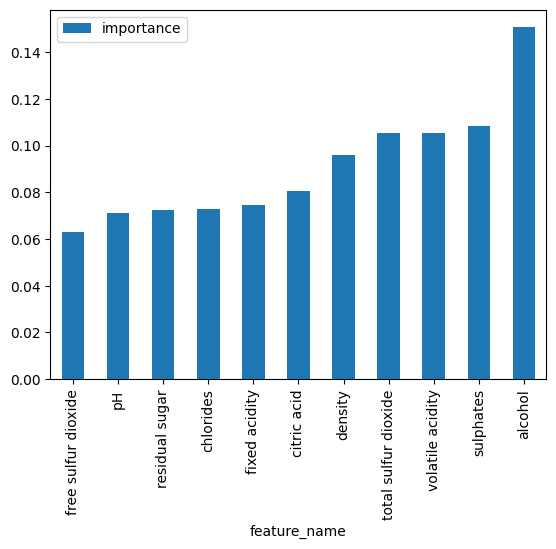

In [103]:
pd.DataFrame({"importance":rf.feature_importances_, "feature_name": rf.feature_names_in_}).sort_values(by='importance').plot(kind="bar", x="feature_name")

## Préparation de la modélisation et du pipeline

In [45]:
# encodage du label
le = LabelEncoder()
y = le.fit_transform(y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# creer une étape custom
from sklearn.base import TransformerMixin, BaseEstimator
class MyIdentityTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, verbose = False):
        self.verbose = verbose

    def fit(self, X, y=None):
        return self

    def transform(self, X,y =None):
        return X

    def set_output(self, transform=None):
        return None

In [50]:
numerical_pipeline = Pipeline( steps=[
    ("identity", MyIdentityTransformer()),
    ("normalization", StandardScaler())
])
preprocessing_pipeline = ColumnTransformer(transformers = [
    ("numerical pipeline", numerical_pipeline, numerical_features)
])

preprocessing_pipeline = preprocessing_pipeline.set_output(transform="pandas")

In [51]:
preprocessing_pipeline

ColumnTransformer(transformers=[('numerical pipeline',
                                 Pipeline(steps=[('identity',
                                                  MyIdentityTransformer()),
                                                 ('normalization',
                                                  StandardScaler())]),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol'])])

In [52]:
full_pipeline = Pipeline( steps=[
    ("preprocessing", preprocessing_pipeline),
    ("model", RandomForestClassifier())
])

## Entrainement du modèle

### Recherche du meilleur jeu d'hyperparamètre avec un gridsearch

In [65]:
param_grid = { "model__max_depth":[3,5,7,10], "model__min_samples_leaf":[3,6,9], "model__n_estimators":[30,50,100]}

In [66]:
grid_clf = GridSearchCV(estimator=full_pipeline, param_grid=param_grid, n_jobs=4)

In [67]:
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical '
                                                                         'pipeline',
                                                                         Pipeline(steps=[('identity',
                                                                                          MyIdentityTransformer()),
                                                                                         ('normalization',
                                                                                          StandardScaler())]),
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'alcohol'])])),
                                       ('model',
                                        RandomForestClassifier(max_depth=7))]),
             param_grid={'model__max_depth': [3, 5, 7, 10],
                         'model__min_samples_leaf': [3, 6, 9],
                         'model__n_estimators': [30, 50, 100]})

In [68]:
grid_clf.cv_results_

{'mean_fit_time': array([0.07247834, 0.26103506, 0.20705376, 0.0529551 , 0.28236151,
        0.21117373, 0.04778547, 0.25881004, 0.1991982 , 0.05478849,
        0.29047542, 0.25812058, 0.22129188, 0.15001202, 0.46105161,
        0.09007621, 0.13825126, 0.43067069, 0.087111  , 0.31493168,
        0.485256  , 0.09772744, 0.31642008, 0.33068252, 0.23870926,
        0.19783816, 0.47855797, 0.10217028, 0.38507915, 0.52631435,
        0.09475904, 0.30848417, 0.46291509, 0.10640244, 0.14344006,
        0.44219646]),
 'std_fit_time': array([0.01550415, 0.17942232, 0.01135557, 0.00902545, 0.22633638,
        0.02694947, 0.00938239, 0.22984359, 0.01050277, 0.00893429,
        0.23144094, 0.02317283, 0.21051888, 0.01185277, 0.33763465,
        0.00981267, 0.01484459, 0.3581624 , 0.01045939, 0.31322099,
        0.33896972, 0.00561488, 0.33994617, 0.03105379, 0.2293227 ,
        0.02733512, 0.30006159, 0.01078378, 0.3157741 , 0.33995327,
        0.00935638, 0.3436032 , 0.21197647, 0.00647607, 0.005

In [69]:
grid_clf.best_params_

{'model__max_depth': 10,
 'model__min_samples_leaf': 3,
 'model__n_estimators': 50}

### Entrainement du modèle avec le jeu d'hyperparamètre le plus adapté

In [71]:
full_pipeline.set_params(**grid_clf.best_params_)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical pipeline',
                                                  Pipeline(steps=[('identity',
                                                                   MyIdentityTransformer()),
                                                                  ('normalization',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=3,
                                        n_estimators=50))])

Maintenant que l'on connait les meilleurs hyperparamètre, on entraine le modèle sans CV sur tout le jeu d'entrainement

In [113]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical pipeline',
                                                  Pipeline(steps=[('identity',
                                                                   MyIdentityTransformer()),
                                                                  ('normalization',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=3,
                                        n_estimators=50))])

In [114]:
rf = full_pipeline.named_steps["model"]

In [116]:
rf.feature_importances_
rf.feature_names_in_

array([0.0702868 , 0.10591942, 0.06096214, 0.0567494 , 0.07679796,
       0.05781985, 0.09770281, 0.09541732, 0.06192412, 0.1206622 ,
       0.19575797])

## Évaluation

In [78]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [74]:
y_pred = full_pipeline.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.621875

In [82]:
precision_score(y_test, y_pred, labels = [5,4], average="weighted")

/home/jeremie/Documents/Cours/MachineLearningSOPRA/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.4964539007092199)

In [76]:
f1_score(y_test, y_pred, average="weighted")

np.float64(0.5938114134542707)

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()